## Import all the packages/libraries needed

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

## Data Pre-processing

Normalize the inputs from 0-255 to between 0 and 1dividing by 255
1. The input values are the pixels in the image, which have a value between 0
to 255.
2. So in order to normalize the data we can simply divide the image values by
255. To do this we first need to make the data a float type, since they are
currently integers. We can do this by using the astype() Numpy command
and then declaring what data type we want
 The augmentation of Image: This is basically synthesising the training data. to do this
using keras.preprocessing library for doing the synthesising part as well as to prepare
the training set as well as the test test set of images that are present in a properly
structured directories, where the directory’s name is take as the label of all the
images present in it.

In [2]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory("C:/Users/user/Building-Image-Classification/data/training",
target_size=(200,200),
batch_size=3,
class_mode='binary')
validation_dataset=validation.flow_from_directory("C:/Users/user/Building-Image-Classification/data/validation",
target_size=(200,200),
batch_size=3,
class_mode='binary')
train_dataset.class_indices
train_dataset.classes

Found 43 images belonging to 2 classes.
Found 43 images belonging to 2 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## build the CNN model

Step 1: Convolution
Step 2: Pooling
Step 3: Flattening
Step 4: Full Connection

In [3]:
model =tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid')
])

## Compile the Model

Steps 4: Compile the Model
1. After the model is created, you compile it using the Adam optimizer, one of the
most popular optimization algorithms
2. Additionally, specify the loss type which is categorical cross entropy which is used
for multi-class classification, use binary cross-entropy as the loss function.

In [4]:
model.compile(loss='binary_crossentropy',
optimizer=RMSprop(lr=0.001),
metrics=['accuracy'])

C:\Users\user\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Training the Model

1. Train the model with Keras' fit() function.
2. Define the model epochs.
3. Print out the model summary to see what the whole model looks like.

In [5]:
model_fit=model.fit(train_dataset,epochs=10,validation_data=validation_dataset)
validation_dataset.class_indices

Epoch 1/10
15/15 [==============================] - 8s 382ms/step - loss: 4.0152 - accuracy: 0.5116 - val_loss: 0.6598 - val_accuracy: 0.6047
Epoch 2/10
15/15 [==============================] - 6s 403ms/step - loss: 0.7238 - accuracy: 0.5116 - val_loss: 0.6666 - val_accuracy: 0.5349
Epoch 3/10
15/15 [==============================] - 6s 400ms/step - loss: 0.9111 - accuracy: 0.5581 - val_loss: 0.5840 - val_accuracy: 0.5581
Epoch 4/10
15/15 [==============================] - 6s 396ms/step - loss: 0.5808 - accuracy: 0.6977 - val_loss: 0.2801 - val_accuracy: 0.9535
Epoch 5/10
15/15 [==============================] - 6s 411ms/step - loss: 0.4438 - accuracy: 0.8140 - val_loss: 0.1882 - val_accuracy: 0.9302
Epoch 6/10
15/15 [==============================] - 6s 378ms/step - loss: 0.2786 - accuracy: 0.8837 - val_loss: 0.0921 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 6s 378ms/step - loss: 0.2065 - accuracy: 0.9302 - val_loss: 0.2543 - val_accuracy: 0.8605
Epoch 

{'cat': 0, 'dog': 1}

## Model Evaluation

In [35]:
# Model evaluation 
scores = model.evaluate(train_dataset,validation_dataset, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


AttributeError: 'History' object has no attribute 'evaluate'

## Model Prediction
1. Pre-process Image 
2. Making new predictions 


AttributeError: 'History' object has no attribute 'predict'

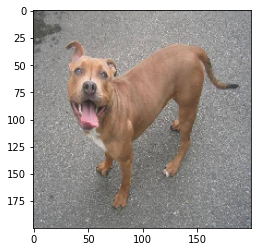

In [37]:
test_image =image.load_img('C:/Users/user/Building-Image-Classification/data/testing/14.jpg',
target_size = (200, 200))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print("The image is "+prediction)